In [12]:
import numpy as np
import pandas as pd
import timesynth as ts
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

np.random.seed()

In [13]:
import matplotlib.pyplot as plt

## Generating synthetic time series

In [14]:
def plot_time_series(time, values, label, legends=None):
    if legends is not None:
        assert len(legends) == len(values)
    if isinstance(values, list):
        series_dict = {'Time': time}
        for v, l in zip(values, legends):
            series_dict[l] = v
        plot_df = pd.DataFrame(series_dict)
        plot_df = pd.melt(plot_df, id_vars='Time', var_name='ts', value_name='Value')
    else:
        series_dict = {'Time': time, "Value": values, "ts": ""}
        plot_df = pd.DataFrame(series_dict)
    if isinstance(values, list):
        fig = px.line(plot_df, x="Time", y="Value", line_dash='ts')
    else:
        fig = px.line(plot_df, x="Time", y="Value")
    
    fig.update_layout(
        autosize=False,
        width=900,
        height=500,
        title={
            'text': label,
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        titlefont={
            'size': 25},
        yaxis=dict(
            title_text="Value",
            titlefont=dict(size=12),
        ),
        xaxis=dict(
            title_text="Time",
            titlefont=dict(size=12),
        )
    )
    return fig


def generate_timeseries(signal, noise=None):
    time_sampler = ts.TimeSampler(stop_time=20)
    regular_time_samples = time_sampler.sample_regular_time(num_points=100)
    timeseries = ts.TimeSeries(signal_generator=signal, noise_generator=noise)
    samples, signals, errors = timeseries.sample(regular_time_samples)
    return samples, regular_time_samples,signals, errors

### White noise

An extreme case of stochastic process that generates a time series is a **white noise** process. It has a sequence of random numbers with zero mean and constant standard deviation. This is also one of the _most popular assumptions of noise_ in a time series.

In [15]:
# sample 200 random values
time = np.arange(200)
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
values = np.random.randn(200) * 100


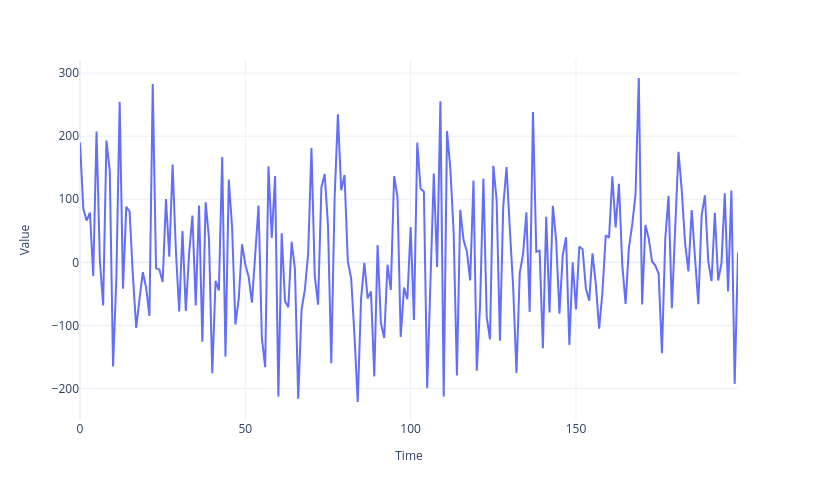

In [17]:
fig = plot_time_series(time, values, "")
fig.show()

### Red noise

has zero mean and constant variance but is serially correlated in time. This **serial correlation** or **redness** is parameterized by a correlation coefficient `r`, such that:

$x_{j+1} = r . x_j + (1 - r^2)^{1/2}. w$

where w is a random sample from a white noise distribution.

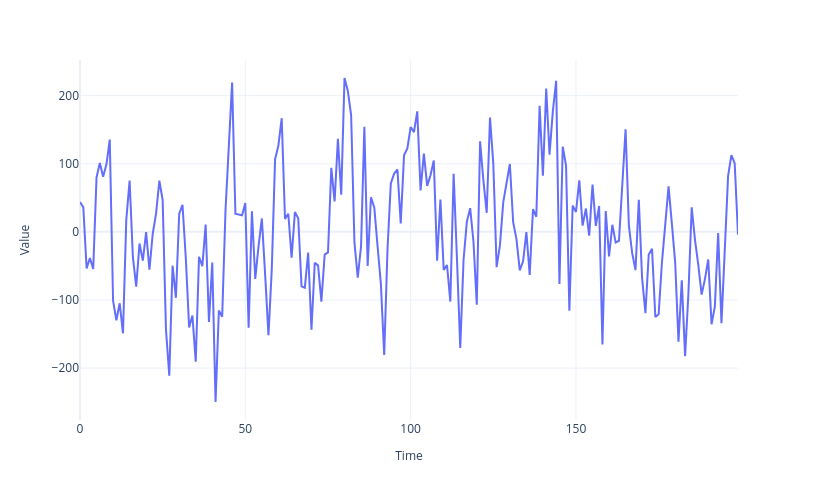

In [18]:
# setting the correlation coefficient
r = 0.4
# generate the time axis
time = np.arange(200)
# Generate white noise
white_noise = np.random.randn(200) * 100
# create red noise
values = np.zeros(200)
for i, v in enumerate(white_noise):
    if i == 0:
        values[i] = v
    else:
        values[i] = r * values[i-1] + np.sqrt(1 - np.power(r, 2)) * v

fig = plot_time_series(time, values, "")
fig.show()

### Cyclical or seasonal signals

using sinusoidal function to create cylclicity.

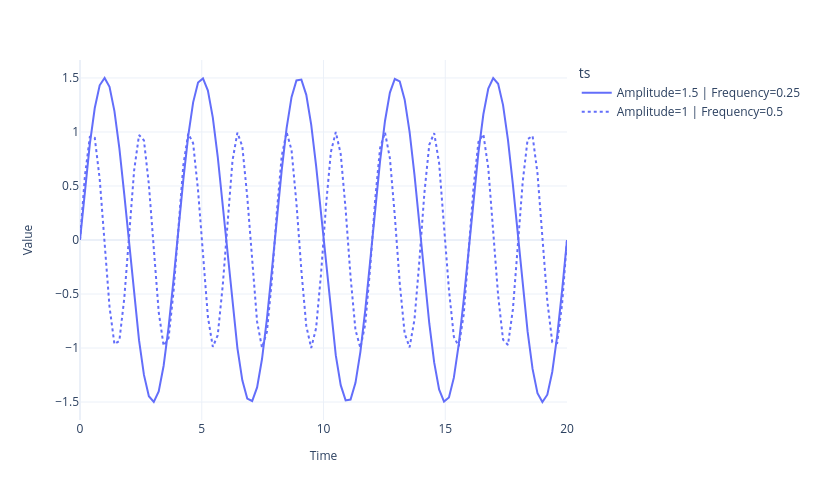

In [19]:
# Sinusoidal Signal with Amplitude=1.5 & Frequency=0.25
signal_1 = ts.signals.Sinusoidal(amplitude=1.5, frequency=0.25)
# Sinusoidal Signal with Amplitude=1 & Frequency=0.5
signal_2 = ts.signals.Sinusoidal(amplitude=1, frequency=0.5)
# Generating the time series
samples1, regular_time_samples, signals_1, errors_1 = generate_timeseries(signal=signal_1)
samples2, regular_time_samples, signals_2, errors_2 = generate_timeseries(signal=signal_2)

# Plot

fig = plot_time_series(regular_time_samples, [samples1, samples2], "",
                       legends=["Amplitude=1.5 | Frequency=0.25", "Amplitude=1 | Frequency=0.5"])
fig.show()

**TimeSynth** has another signal called **PseudoPeriodic**. This is like the **Sinusoidal** class, but the frequency and amplitude itself has some stochasticity.

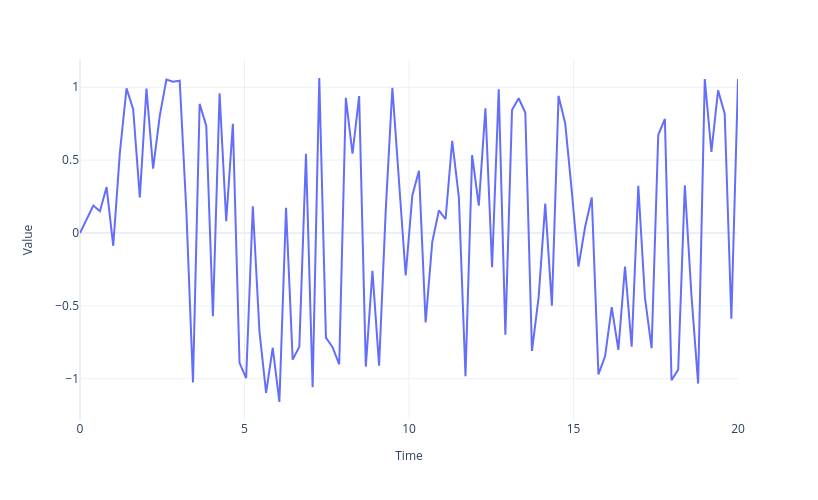

In [20]:
# PseudoPeriodic signal with Amplitude=1 & Frequency=0.25
signal = ts.signals.PseudoPeriodic(amplitude=1, frequency=0.25)
# Generating time series
samples, regular_time_samples, signals, errors = generate_timeseries(signal=signal)
fig = plot_time_series(regular_time_samples,
                       samples,
                       "")
fig.show()

### Autoregressive signals

An AR signal refers to when the value of a time series for the current timestep is dependent on the values of the time series in the previous timesteps. This serial correlation is a key property of the AR signal at it is parametrized by a few parameters:-
* Order of serial correlation
* Coefficients to combine the previous timesteps

In [ ]:
# Autoregressive signal with parameter 1.5 and -0.75
# y(t) = 1.5 * y(t-1) - 0.75 * y (t-2)
signal = ts.signals.AutoRegressive(ar_param=[1.5, -0.75])
# Generate timeseries
samples, regular_time_samples, signals, errors = generate_timeseries(signal=signal)

In [11]:
%config Completer.use_jedi = False